# **Đồ án môn học IE224**

## **BƯỚC 1: LÀM SẠCH BỘ DỮ LIỆU**

### **BƯỚC 1.1 IMPORT BỘ DỮ LIỆU ĐỂ TIẾN HÀNH XỬ LÝ**


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns
from scipy.stats import mode
import os # accessing directory structure
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
# Đọc dữ liệu
os.chdir(r'C:\Users\Phuc Phan\PyCharmMiscProject')
df = pd.read_csv('flights_sample_3m.csv')

### **BƯỚC 1.2 TÌM HIỂU BỘ DỮ LIỆU**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [5]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'], dtype='object')

In [6]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

In [7]:
df.dtypes

FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER   

In [8]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,2.920058e+06,2.913802e+06,3.000000e+06,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,1.466511e+03,4.260858e+00,2.638000e-02,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,5.318383e+02,5.117482e+01,1.602626e-01,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,1.053000e+03,-1.600000e+01,0.000000e+00,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,1.505000e+03,-7.000000e+00,0.000000e+00,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,1.913000e+03,7.000000e+00,0.000000e+00,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,2.400000e+03,2.934000e+03,1.000000e+00,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


### **BƯỚC 1.3 : Tiến hành làm sạch bộ dữ liệu**

#### **BƯỚC 1.3.1 : Tiến hành loại bỏ các chuyến bay bị trễ hoặc các chuyến bay bị hủy**

##### **Tiến hành loại _bỏ_ các dòng liên quan đến các chuyến bay bị hủy hoặc chuyển hướng**

In [10]:

# Lọc: Chỉ giữ lại chuyến bay KHÔNG hủy (0.0) và KHÔNG chuyển hướng (0.0)
print(f"Kích thước DataFrame gốc: {len(df)}")
df = df[(df['CANCELLED'] == 0.0) & (df['DIVERTED'] == 0.0)].copy()
print("\n----------------- 3. Sau khi Lọc dữ liệu ----------------------------------")
print(f"Kích thước DataFrame đã lọc: {len(df)}")


Kích thước DataFrame gốc: 3000000

----------------- 3. Sau khi Lọc dữ liệu ----------------------------------
Kích thước DataFrame đã lọc: 2913804


##### **Tiến hành loại _bỏ_ các thuộc tính liên quan đến các chuyến bay bị hủy hoặc chuyển hướng**

In [11]:
# Danh sách các cột cần loại bỏ
cols_to_drop_cancellation_divert = ['CANCELLED', 'CANCELLATION_CODE', 'DIVERTED']

# Loại bỏ các cột khỏi DataFrame df_clean
# errors='ignore' đảm bảo code vẫn chạy nếu một trong các cột (ví dụ: CANCELL_CODE) chưa tồn tại
# hoặc đã bị loại bỏ ở các bước trước đó.
df = df.drop(columns=cols_to_drop_cancellation_divert, errors='ignore')

print("✅ Đã loại bỏ các cột CANCELLED, CANCELL_CODE và DIVERTED.")
print(f"Kích thước DataFrame mới: {df.shape}")


✅ Đã loại bỏ các cột CANCELLED, CANCELL_CODE và DIVERTED.
Kích thước DataFrame mới: (2913804, 29)


In [12]:
df.columns


Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'], dtype='object')

In [13]:
df.head()


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                         0
WHEELS_OFF                       0
WHEELS_ON                        2
TAXI_IN                          2
CRS_ARR_TIME                     0
ARR_TIME                         2
ARR_DELAY                        2
CRS_ELAPSED_TIME                 0
ELAPSED_TIME                     2
AIR_TIME                         2
DISTANCE                         0
DELAY_DUE_CARRIER          2379941
DELAY_DUE_WEATHER          2379941
DELAY_DUE_NAS              2379941
DELAY_DUE_SECURITY         2379941
DELAY_DUE_LATE_AIRCR

#### **BƯỚC 1.3.2 Đưa khoảng cách chuyến bay từ miles về kilometer**

In [15]:
# In giá trị trước khi chuyển đổi
print("Before conversion:")
print(df['DISTANCE'].head())

# Chuyển DISTANCE sang số và đổi đơn vị miles -> km
df['DISTANCE'] = pd.to_numeric(df['DISTANCE'], errors='coerce')
df['DISTANCE'] = df['DISTANCE'] * 1.6093

# In giá trị sau khi chuyển đổi
print("\nAfter conversion:")
print(df['DISTANCE'].head())


Before conversion:
0    1065.0
1    1399.0
2     680.0
3    1589.0
4     985.0
Name: DISTANCE, dtype: float64

After conversion:
0    1713.9045
1    2251.4107
2    1094.3240
3    2557.1777
4    1585.1605
Name: DISTANCE, dtype: float64


#### **BƯỚC 1.3.3 Đưa thời gian từ dạng float64 về dạng datetime**


In [16]:
print("=== BEFORE CLEANING ===")
print(df[['ARR_TIME','DEP_TIME','CRS_DEP_TIME','CRS_ARR_TIME','WHEELS_OFF','WHEELS_ON']].head())


# --- Hàm chuyển HHMM → pandas datetime64 ---
def format_heure_to_datetime(x):
    if pd.isnull(x):
        return pd.NaT

    # Trường hợp đặc biệt 2400 = 00:00
    if x == 2400 or x == "2400":
        x = "0000"

    # Đảm bảo đủ 4 chữ số
    x = f"{int(x):04d}"
    hour = int(x[:2])
    minute = int(x[2:])

    # Nếu giờ là 24 thì chuyển thành 00
    if hour == 24:
        hour = 0

    # Gán ngày mặc định để tạo datetime64
    return pd.Timestamp(year=2000, month=1, day=1, hour=hour, minute=minute)


# --- Áp dụng cho 6 cột thời gian ---
cols = ['ARR_TIME','DEP_TIME','CRS_DEP_TIME','CRS_ARR_TIME','WHEELS_OFF','WHEELS_ON']

for col in cols:
    df[col] = df[col].apply(format_heure_to_datetime)


print("\n=== AFTER CLEANING ===")
print(df[['ARR_TIME','DEP_TIME','CRS_DEP_TIME','CRS_ARR_TIME','WHEELS_OFF','WHEELS_ON']].head())

print("\n=== DATA TYPES ===")
print(df[cols].dtypes)

=== BEFORE CLEANING ===
   ARR_TIME  DEP_TIME  CRS_DEP_TIME  CRS_ARR_TIME  WHEELS_OFF  WHEELS_ON
0    1447.0    1151.0          1155          1501      1210.0     1443.0
1    2310.0    2114.0          2120          2315      2123.0     2232.0
2    1252.0    1000.0           954          1252      1020.0     1247.0
3    1853.0    1608.0          1609          1829      1635.0     1844.0
4    2040.0    1838.0          1840          2041      1853.0     2026.0

=== AFTER CLEANING ===
             ARR_TIME            DEP_TIME        CRS_DEP_TIME        CRS_ARR_TIME          WHEELS_OFF           WHEELS_ON
0 2000-01-01 14:47:00 2000-01-01 11:51:00 2000-01-01 11:55:00 2000-01-01 15:01:00 2000-01-01 12:10:00 2000-01-01 14:43:00
1 2000-01-01 23:10:00 2000-01-01 21:14:00 2000-01-01 21:20:00 2000-01-01 23:15:00 2000-01-01 21:23:00 2000-01-01 22:32:00
2 2000-01-01 12:52:00 2000-01-01 10:00:00 2000-01-01 09:54:00 2000-01-01 12:52:00 2000-01-01 10:20:00 2000-01-01 12:47:00
3 2000-01-01 18:53:00 2000

In [17]:
df.dtypes

FL_DATE                            object
AIRLINE                            object
AIRLINE_DOT                        object
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST                               object
DEST_CITY                          object
CRS_DEP_TIME               datetime64[ns]
DEP_TIME                   datetime64[ns]
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                 datetime64[ns]
WHEELS_ON                  datetime64[ns]
TAXI_IN                           float64
CRS_ARR_TIME               datetime64[ns]
ARR_TIME                   datetime64[ns]
ARR_DELAY                         float64
CRS_ELAPSED_TIME                  float64
ELAPSED_TIME                      float64
AIR_TIME                          float64
DISTANCE                          

#### **BƯỚC 1.3.4 Loại bỏ các cột gây rò rỉ dữ liệu (Data Leakage) cho bài toán Dự báo**
Vì mục tiêu là dự báo trễ chuyến bay (Prediction) trước khi hoặc ngay khi máy bay cất cánh, chúng ta bắt buộc phải loại bỏ các cột chứa thông tin "tương lai" chỉ có được sau khi máy bay đã hạ cánh.

Các cột cần xóa bao gồm:
1. **Chi tiết nguyên nhân trễ (DELAY_DUE_...):** Vì tổng các cột này chính bằng ARR_DELAY.
2. **CANCELLATION_CODE:** Vì chúng ta đã lọc bỏ các chuyến hủy.
3. **ARR_DELAY:** (Chỉ xóa khỏi tập biến đầu vào X sau khi đã tạo xong nhãn dự báo y. Tuy nhiên, ở bước làm sạch này, ta xóa các cột nguyên nhân trước).

In [18]:
# Danh sách các cột gây rò rỉ dữ liệu (Data Leakage)
# 1. Danh sách các cột chứa thông tin rò rỉ (Data Leakage)
leakage_cols = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT',
    'CANCELLATION_CODE'
]

# 2. Thực hiện Tách Dữ Liệu (Data Forking)
print("⏳ Đang tách dữ liệu thành 2 bản sao...")
df_analysis = df.copy()
df_model = df.copy()

# ==============================================================================
# NHÁNH 1: XỬ LÝ CHO df_analysis (Dùng để Phân tích & Clustering)
# ==============================================================================
# Giữ lại các cột nguyên nhân, nhưng điền 0 vào các giá trị NaN (vì NaN nghĩa là không trễ do nguyên nhân đó)
# Chỉ xử lý các cột tồn tại trong df
cols_to_fill = [col for col in leakage_cols if col in df_analysis.columns]

for col in cols_to_fill:
    # Chuyển sang số và điền 0
    df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce').fillna(0)

print(f"✅ [df_analysis] Đã giữ lại và làm sạch {len(cols_to_fill)} cột nguyên nhân để phục vụ Phân tích/Clustering.")

# ==============================================================================
# NHÁNH 2: XỬ LÝ CHO df_model (Dùng để Train Model Dự báo)
# ==============================================================================
# Xóa bỏ hoàn toàn các cột nguyên nhân để tránh model "nhìn trộm đáp án"
# errors='ignore' giúp code không lỗi nếu cột đã bị xóa từ trước
df_model.drop(columns=leakage_cols, axis=1, inplace=True, errors='ignore')

print(f"✅ [df_model] Đã xóa bỏ các cột gây rò rỉ dữ liệu.")
print(f"   - Kích thước df_model: {df_model.shape} (Dùng cái này để train model)")
print(f"   - Kích thước df_analysis: {df_analysis.shape} (Dùng cái này để vẽ biểu đồ EDA)")

⏳ Đang tách dữ liệu thành 2 bản sao...
✅ [df_analysis] Đã giữ lại và làm sạch 5 cột nguyên nhân để phục vụ Phân tích/Clustering.
✅ [df_model] Đã xóa bỏ các cột gây rò rỉ dữ liệu.
   - Kích thước df_model: (2913804, 24) (Dùng cái này để train model)
   - Kích thước df_analysis: (2913804, 29) (Dùng cái này để vẽ biểu đồ EDA)


### **BƯỚC 1.4 Xử lý các giá trị bị khuyết**

In [19]:
# Tính số lượng missing cho mỗi cột
missing_counts = df.isnull().sum()

# Lọc chỉ các cột có missing > 0
missing_cols = missing_counts[missing_counts > 0]

# In ra
print("Các cột có giá trị null và số lượng missing:")
print(missing_cols)

Các cột có giá trị null và số lượng missing:
WHEELS_ON                        2
TAXI_IN                          2
ARR_TIME                         2
ARR_DELAY                        2
ELAPSED_TIME                     2
AIR_TIME                         2
DELAY_DUE_CARRIER          2379941
DELAY_DUE_WEATHER          2379941
DELAY_DUE_NAS              2379941
DELAY_DUE_SECURITY         2379941
DELAY_DUE_LATE_AIRCRAFT    2379941
dtype: int64


Trong quá trình quan sát bộ dữ liệu, ta thấy dữ liệu bị khuyết ở các cột:


WHEELS_ON                        2

TAXI_IN                          2

ARR_TIME                         2

ARR_DELAY                        2

ELAPSED_TIME                     2

AIR_TIME                         2

DELAY_DUE_CARRIER          2379941

DELAY_DUE_WEATHER          2379941

DELAY_DUE_NAS              2379941

DELAY_DUE_SECURITY         2379941

DELAY_DUE_LATE_AIRCRAFT    2379941


Giờ ta sẽ xử lý khuyết cho các cột này.


#### **Xử lý riêng cho tập Phân tích (df_analysis): Điền khuyết các nguyên nhân trễ**

#### **CÁC CỘT DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT **

Các cột trên chính là thành phần của ARR_DELAY. MỘT CHUYẾN BAY THÌ CHỈ CÓ 1 VÀI NGUYÊN NHÂN TRỄ NHẤT ĐỊNH

==> Chúng ta sẽ tiến hành điền vào các giá trị trống bằng số 0

In [20]:
delay_cols = [
    "DELAY_DUE_CARRIER",
    "DELAY_DUE_SECURITY",
    "DELAY_DUE_NAS",
    "DELAY_DUE_WEATHER",
    "DELAY_DUE_LATE_AIRCRAFT"
]

# Kiểm tra xem các cột này có trong df_analysis không (để tránh lỗi)
cols_to_process = [col for col in delay_cols if col in df_analysis.columns]

if cols_to_process:
    # 1. Chuyển sang numeric (non-numeric sẽ thành NaN)
    for c in cols_to_process:
        df_analysis[c] = pd.to_numeric(df_analysis[c], errors="coerce")

    # 2. Điền NaN bằng 0
    df_analysis[cols_to_process] = df_analysis[cols_to_process].fillna(0)

    # 3. Ép kiểu int cho đẹp (vì số phút trễ là số nguyên)
    df_analysis[cols_to_process] = df_analysis[cols_to_process].astype(int)

    print(f" [df_analysis] Đã điền 0 và ép kiểu int cho {len(cols_to_process)} cột nguyên nhân trễ.")
    display(df_analysis[cols_to_process].head())
else:
    print(" Không tìm thấy các cột delay_cols trong df_analysis.")


 [df_analysis] Đã điền 0 và ép kiểu int cho 5 cột nguyên nhân trễ.


,DELAY_DUE_CARRIER,DELAY_DUE_SECURITY,DELAY_DUE_NAS,DELAY_DUE_WEATHER,DELAY_DUE_LATE_AIRCRAFT
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,24,0,0
4,0,0,0,0,0


In [21]:
# Tính số lượng missing cho mỗi cột
missing_counts = df_analysis.isnull().sum()

# Lọc chỉ các cột có missing > 0
missing_cols = missing_counts[missing_counts > 0]

# In ra
print("Các cột có giá trị null và số lượng missing:")
print(missing_cols)

Các cột có giá trị null và số lượng missing:
WHEELS_ON       2
TAXI_IN         2
ARR_TIME        2
ARR_DELAY       2
ELAPSED_TIME    2
AIR_TIME        2
dtype: int64


In [22]:
print(f"Kích thước DataFrame đã lọc: {len(df_analysis)}")

Kích thước DataFrame đã lọc: 2913804


#### CÁC CỘT WHEELS_ON, TAXI_IN, ARR_TIME, ARR_DELAY, ELAPSED_TIME, AIR_TIME

Với số lượng giá trị bị thiếu (NULL) chỉ là 2 dòng trên tổng số hàng trăm ngàn dòng dữ liệu, phương án xử lý tốt nhất, an toàn nhất và nhanh nhất là Xóa bỏ các dòng này (Drop Rows).

Lý do:

Số lượng không đáng kể: Việc mất 2 dòng dữ liệu không ảnh hưởng đến độ chính xác của mô hình thống kê hay Machine Learning.

Dữ liệu liên quan chặt chẽ: Các cột WHEELS_ON, TAXI_IN, ARR_TIME có mối quan hệ logic (Thời gian đến = Wheels On + Taxi In). Nếu một trong số chúng bị thiếu, việc điền dữ liệu giả (imputation) rất dễ gây sai lệch logic.

In [23]:
# Danh sách các cột thời gian quan trọng có giá trị NULL cần xử lý
cols_to_fix = ['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME']

print("--- BẮT ĐẦU XỬ LÝ GIÁ TRỊ KHUYẾT CHO CẢ 2 TẬP DỮ LIỆU ---")

# 1. Xử lý trên tập MODEL (df_model)
# Đây là tập quan trọng nhất để chạy mô hình, không được phép có NaN
print(f"Kích thước df_model trước khi xóa: {df_model.shape}")
df_model.dropna(subset=cols_to_fix, inplace=True)
print(f"Kích thước df_model sau khi xóa:   {df_model.shape}")

# 2. Xử lý trên tập ANALYSIS (df_analysis)
# Xử lý tương tự để đảm bảo dữ liệu phân tích sạch sẽ và đồng bộ với model
print(f"Kích thước df_analysis trước khi xóa: {df_analysis.shape}")
df_analysis.dropna(subset=cols_to_fix, inplace=True)
print(f"Kích thước df_analysis sau khi xóa:   {df_analysis.shape}")

# 3. Kiểm tra lại kết quả
print("\n--- Kiểm tra lại số lượng NULL còn lại (Phải bằng 0) ---")
print(f"Tổng NULL trên df_model:    {df_model[cols_to_fix].isna().sum().sum()}")
print(f"Tổng NULL trên df_analysis: {df_analysis[cols_to_fix].isna().sum().sum()}")

--- BẮT ĐẦU XỬ LÝ GIÁ TRỊ KHUYẾT CHO CẢ 2 TẬP DỮ LIỆU ---
Kích thước df_model trước khi xóa: (2913804, 24)
Kích thước df_model sau khi xóa:   (2913802, 24)
Kích thước df_analysis trước khi xóa: (2913804, 29)
Kích thước df_analysis sau khi xóa:   (2913802, 29)

--- Kiểm tra lại số lượng NULL còn lại (Phải bằng 0) ---
Tổng NULL trên df_model:    0
Tổng NULL trên df_analysis: 0


In [24]:
print(f"Kích thước DataFrame đã lọc: {len(df)}")

Kích thước DataFrame đã lọc: 2913804


In [25]:
# Tính số lượng missing cho mỗi cột
missing_counts = df.isnull().sum()

# Lọc chỉ các cột có missing > 0
missing_cols = missing_counts[missing_counts > 0]

# In ra
print("Các cột có giá trị null và số lượng missing:")
print(missing_cols)

Các cột có giá trị null và số lượng missing:
WHEELS_ON                        2
TAXI_IN                          2
ARR_TIME                         2
ARR_DELAY                        2
ELAPSED_TIME                     2
AIR_TIME                         2
DELAY_DUE_CARRIER          2379941
DELAY_DUE_WEATHER          2379941
DELAY_DUE_NAS              2379941
DELAY_DUE_SECURITY         2379941
DELAY_DUE_LATE_AIRCRAFT    2379941
dtype: int64


In [26]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'], dtype='object')

In [27]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",2000-01-01 11:55:00,2000-01-01 11:51:00,-4.0,19.0,2000-01-01 12:10:00,2000-01-01 14:43:00,4.0,2000-01-01 15:01:00,2000-01-01 14:47:00,-14.0,186.0,176.0,153.0,1713.9045,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2000-01-01 21:20:00,2000-01-01 21:14:00,-6.0,9.0,2000-01-01 21:23:00,2000-01-01 22:32:00,38.0,2000-01-01 23:15:00,2000-01-01 23:10:00,-5.0,235.0,236.0,189.0,2251.4107,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",2000-01-01 09:54:00,2000-01-01 10:00:00,6.0,20.0,2000-01-01 10:20:00,2000-01-01 12:47:00,5.0,2000-01-01 12:52:00,2000-01-01 12:52:00,0.0,118.0,112.0,87.0,1094.3240,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",2000-01-01 16:09:00,2000-01-01 16:08:00,-1.0,27.0,2000-01-01 16:35:00,2000-01-01 18:44:00,9.0,2000-01-01 18:29:00,2000-01-01 18:53:00,24.0,260.0,285.0,249.0,2557.1777,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",2000-01-01 18:40:00,2000-01-01 18:38:00,-2.0,15.0,2000-01-01 18:53:00,2000-01-01 20:26:00,14.0,2000-01-01 20:41:00,2000-01-01 20:40:00,-1.0,181.0,182.0,153.0,1585.1605,NaN,NaN,NaN,NaN,NaN


In [28]:
print("DEP_DELAY Min:", df['DEP_DELAY'].min())
print("DEP_DELAY Max:", df['DEP_DELAY'].max())
row_max_dep_delay = df.loc[df['DEP_DELAY'].idxmax()]
print(row_max_dep_delay)
print("ARR_DELAY Min:", df['ARR_DELAY'].min())
print("ARR_DELAY Max:", df['ARR_DELAY'].max())
row_max_dep_delay = df.loc[df['ARR_DELAY'].idxmax()]
print(row_max_dep_delay)


DEP_DELAY Min: -90.0
DEP_DELAY Max: 2966.0
FL_DATE                                    2022-03-26
AIRLINE                        American Airlines Inc.
AIRLINE_DOT                American Airlines Inc.: AA
AIRLINE_CODE                                       AA
DOT_CODE                                        19805
FL_NUMBER                                        2854
ORIGIN                                            DSM
ORIGIN_CITY                            Des Moines, IA
DEST                                              CLT
DEST_CITY                               Charlotte, NC
CRS_DEP_TIME                      2000-01-01 06:40:00
DEP_TIME                          2000-01-01 08:06:00
DEP_DELAY                                      2966.0
TAXI_OUT                                         15.0
WHEELS_OFF                        2000-01-01 08:21:00
WHEELS_ON                         2000-01-01 10:52:00
TAXI_IN                                           6.0
CRS_ARR_TIME                      2000-

## **BƯỚC 2: EXPLORE DATA ANALYSIS**

### **BƯỚC 2.1 EDA theo hướng phân tán**

#### **BƯỚC 2.1.1 Chuẩn hóa hiển thị dữ liệu và gom toàn bộ các biến định lượng vào một danh sách phục vụ cho việc phân tích thống kê và trực quan hóa trong EDA**.

In [29]:
# Cấu hình hiển thị
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

# Định nghĩa các nhóm biến (Dùng cho df_analysis)
time_cols = ['DEP_DELAY', 'ARR_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE']
reason_cols = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Tổng hợp (chỉ lấy các cột còn tồn tại trong df_analysis)
numeric_columns = [col for col in time_cols + reason_cols if col in df_analysis.columns]

print("✅ Đã cấu hình cho bài toán PHÂN TÍCH (EDA):")
print(f"   - Sử dụng tập dữ liệu: df_analysis {df_analysis.shape}")
print(f"   - Phân tích {len(time_cols)} biến thời gian và {len(reason_cols)} biến nguyên nhân.")

✅ Đã cấu hình cho bài toán PHÂN TÍCH (EDA):
   - Sử dụng tập dữ liệu: df_analysis (2913802, 29)
   - Phân tích 7 biến thời gian và 5 biến nguyên nhân.


#### **BƯỚC 2.2.2 Tính toàn bộ các thống kê độ phân tán (range, mean, variance, standard deviation, CV, quartiles, IQR) cho tất cả các biến định lượng nhằm đánh giá mức độ biến thiên và tóm tắt đặc trưng phân phối của dữ liệu.**

In [31]:
# Tạo hàm tính toán các chỉ số
def calculate_dispersion_stats(df, columns):
    stats_df = pd.DataFrame(index=columns)

    # Tính toán các chỉ số cơ bản
    stats_df['Min'] = df[columns].min()
    stats_df['Max'] = df[columns].max()
    stats_df['Range'] = stats_df['Max'] - stats_df['Min']
    stats_df['Mode'] = df[columns].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    stats_df['Mean'] = df[columns].mean()
    stats_df['Median'] = df[columns].median()
    stats_df['Std_Dev'] = df[columns].std()
    stats_df['Variance'] = df[columns].var()

    # Hệ số biến thiên (CV) = (Std / Mean) * 100
    # Lưu ý: Xử lý trường hợp Mean = 0 để tránh lỗi chia cho 0
    stats_df['CV (%)'] = df[columns].apply(lambda x: (x.std() / x.mean() * 100) if x.mean() != 0 else 0)

    # Tứ phân vị và IQR
    stats_df['Q1 (25%)'] = df[columns].quantile(0.25)
    stats_df['Q3 (75%)'] = df[columns].quantile(0.75)
    stats_df['IQR'] = stats_df['Q3 (75%)'] - stats_df['Q1 (25%)']

    return stats_df

# Thực thi và hiển thị
dispersion_summary = calculate_dispersion_stats(df, numeric_columns)

print("📊 Bảng thống kê phân tán (Dispersion Summary):")
display(dispersion_summary)

📊 Bảng thống kê phân tán (Dispersion Summary):


,Min,Max,Range,Mode,Mean,Median,Std_Dev,Variance,CV (%),Q1 (25%),Q3 (75%),IQR
DEP_DELAY,-90.00,2966.00,3056.00,-5.00,10.05,-2.00,49.05,2405.89,488.05,-6.00,6.00,12.00
ARR_DELAY,-96.00,2934.00,3030.00,-11.00,4.26,-7.00,51.17,2618.86,1201.05,-16.00,7.00,23.00
TAXI_OUT,1.00,184.00,183.00,12.00,16.64,14.00,9.18,84.27,55.18,11.00,19.00,8.00
TAXI_IN,1.00,249.00,248.00,4.00,7.67,6.00,6.25,39.09,81.47,4.00,9.00,5.00
ELAPSED_TIME,15.00,739.00,724.00,79.00,136.62,120.00,71.68,5137.42,52.46,84.00,167.00,83.00
AIR_TIME,8.00,692.00,684.00,62.00,112.31,95.00,69.75,4865.74,62.11,61.00,142.00,81.00
DISTANCE,46.67,9353.25,9306.58,542.33,1304.69,1050.87,948.47,899601.73,72.70,608.32,1684.94,1076.62
DELAY_DUE_CARRIER,0.00,2934.00,2934.00,0.00,24.76,4.00,71.77,5151.20,289.88,0.00,23.00,23.00
DELAY_DUE_WEATHER,0.00,1653.00,1653.00,0.00,3.99,0.00,32.41,1050.46,813.27,0.00,0.00,0.00
DELAY_DUE_NAS,0.00,1741.00,1741.00,0.00,13.16,0.00,33.16,1099.66,251.89,0.00,17.00,17.00


Bảng thống kê mô tả dữ liệu chuyến bay cho thấy các biến thời gian chuyến bay như DEP_DELAY, ARR_DELAY, TAXI_OUT, TAXI_IN, ELAPSED_TIME, AIR_TIME và DISTANCE đều có phân phối lệch phải (Mean > Median), phần lớn chuyến bay không trễ hoặc trễ ít, nhưng tồn tại một số chuyến trễ cực lớn (outlier). Các biến này có độ biến thiên vừa phải (CV từ 52% đến 72%) và một số biến taxi hoặc khoảng cách có range rộng, phản ánh sự khác biệt về loại chuyến bay.


Đối với biến DEP_DELAY và ARR_DELAY, range rất rộng (-90 → 2966 phút đối với DEP_DELAY, -96 → 2934 phút đối với ARR_DELAY), và xuất hiện giá trị âm do một số chuyến bay cất cánh hoặc hạ cánh sớm. Đây là lý do dữ liệu cần xử lý đặc biệt trước khi áp dụng các mô hình hồi quy.

#### **Trực quan hóa độ phân tán của các biến thời gian bay và các nguyên nhân gây trễ bằng biểu đồ boxplot nhằm nhận diện ngoại lệ, sự biến thiên và đặc điểm phân phối của dữ liệu**.

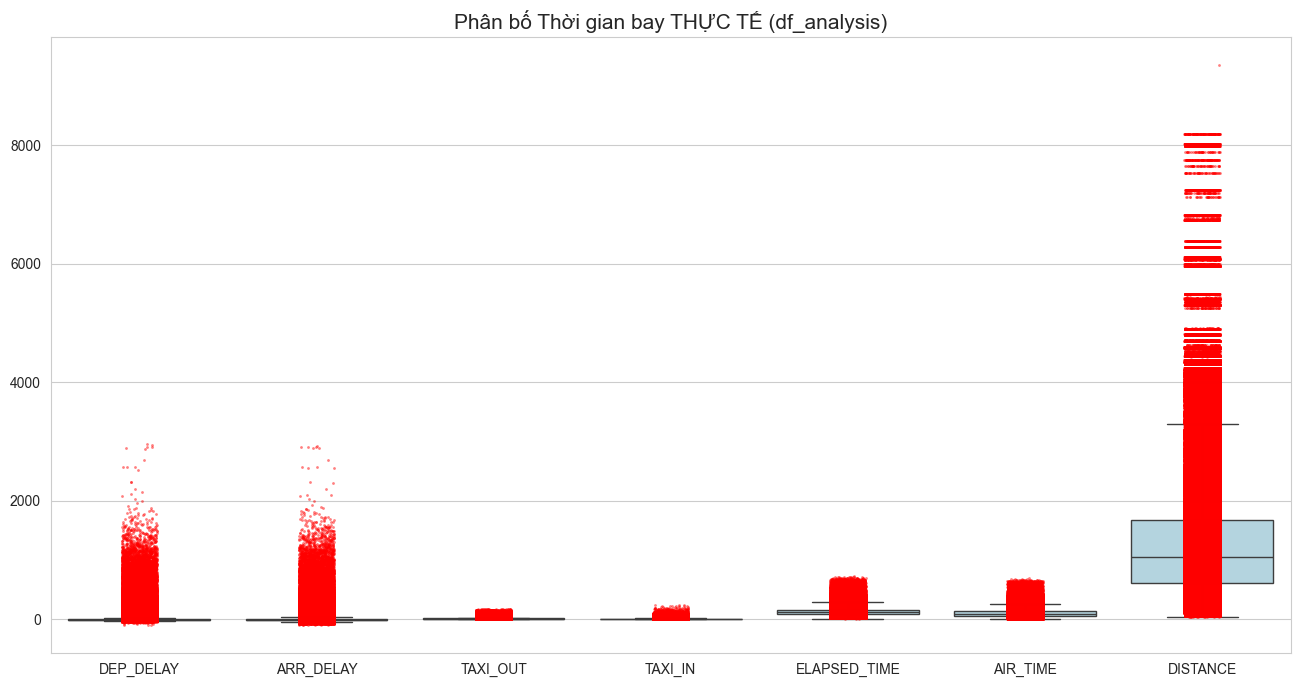

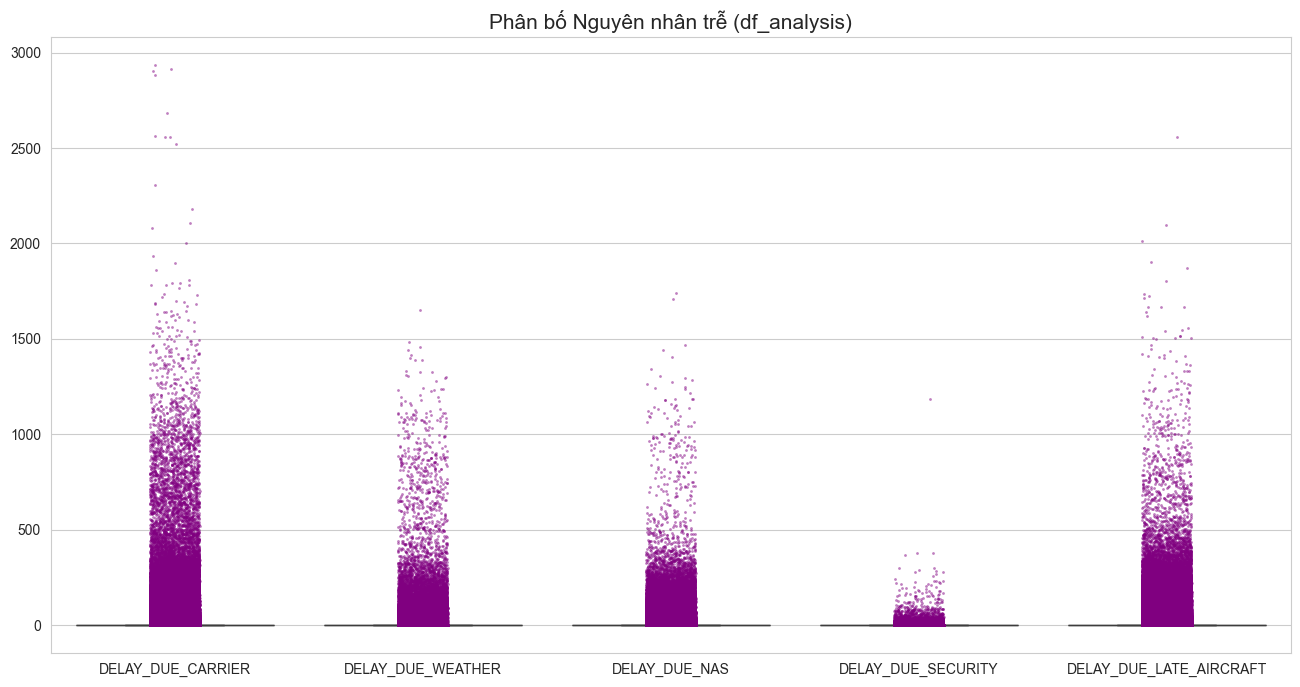

===== OUTLIERS THỰC TẾ (df_analysis) =====


,column,low_outliers,high_outliers,total
0,DEP_DELAY,1185,389092,390277
1,ARR_DELAY,2927,255313,258240
2,TAXI_OUT,0,165613,165613
3,TAXI_IN,0,178573,178573
4,ELAPSED_TIME,0,144888,144888
5,AIR_TIME,0,148328,148328
6,DISTANCE,0,164949,164949


In [32]:
# 1. Vẽ Boxplot cho Time Cols
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_analysis[time_cols], color="lightblue", showfliers=False) # Ẩn điểm đen để nhìn rõ box
sns.stripplot(data=df_analysis[time_cols], color="red", alpha=0.5, jitter=True, size=2) # Hiện điểm thực tế
plt.title("Phân bố Thời gian bay THỰC TẾ (df_analysis)", fontsize=15)
plt.show()

# 2. Vẽ Boxplot cho Reason Cols (Cái model không nhìn thấy, nhưng ta cần thấy)
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_analysis[reason_cols], color="lightgreen", showfliers=False)
sns.stripplot(data=df_analysis[reason_cols], color="purple", alpha=0.5, jitter=True, size=2)
plt.title("Phân bố Nguyên nhân trễ (df_analysis)", fontsize=15)
plt.show()

# 3. Đếm số lượng Outliers
def count_outliers(df_input, cols):
    rows = []
    for col in cols:
        if col in df_input.columns:
            s = df_input[col].dropna()
            Q1 = s.quantile(0.25)
            Q3 = s.quantile(0.75)
            IQR = Q3 - Q1
            low_bound = Q1 - 1.5 * IQR
            high_bound = Q3 + 1.5 * IQR

            low = (s < low_bound).sum()
            high = (s > high_bound).sum()
            rows.append({"column": col, "low_outliers": low, "high_outliers": high, "total": low+high})
    return pd.DataFrame(rows)

print("===== OUTLIERS THỰC TẾ (df_analysis) =====")
display(count_outliers(df_analysis, time_cols))

### **BƯỚC 2.2 EDA SHAPE OF DATA**.

#### **BƯỚC 2.2.1 KDE CHO TỪNG BIẾN BÊN TRON BỘ DỮ LIỆU**.

##### **Kernel Density Estimation (KDE) được sử dụng nhằm mô tả và so sánh phân phối của các biến thời gian và biến nguyên nhân trễ chuyến bay trước và sau khi xử lý ngoại lệ. KDE cho phép quan sát trực quan dạng phân phối dữ liệu một cách mượt và liên tục, hỗ trợ đánh giá mức độ lệch, độ nhọn và sự thay đổi hình dạng phân phối sau quá trình capping và winsorization. Đây là công cụ quan trọng trong việc kiểm định tính hợp lý của bước tiền xử lý dữ liệu trước khi đưa vào mô hình dự đoán**

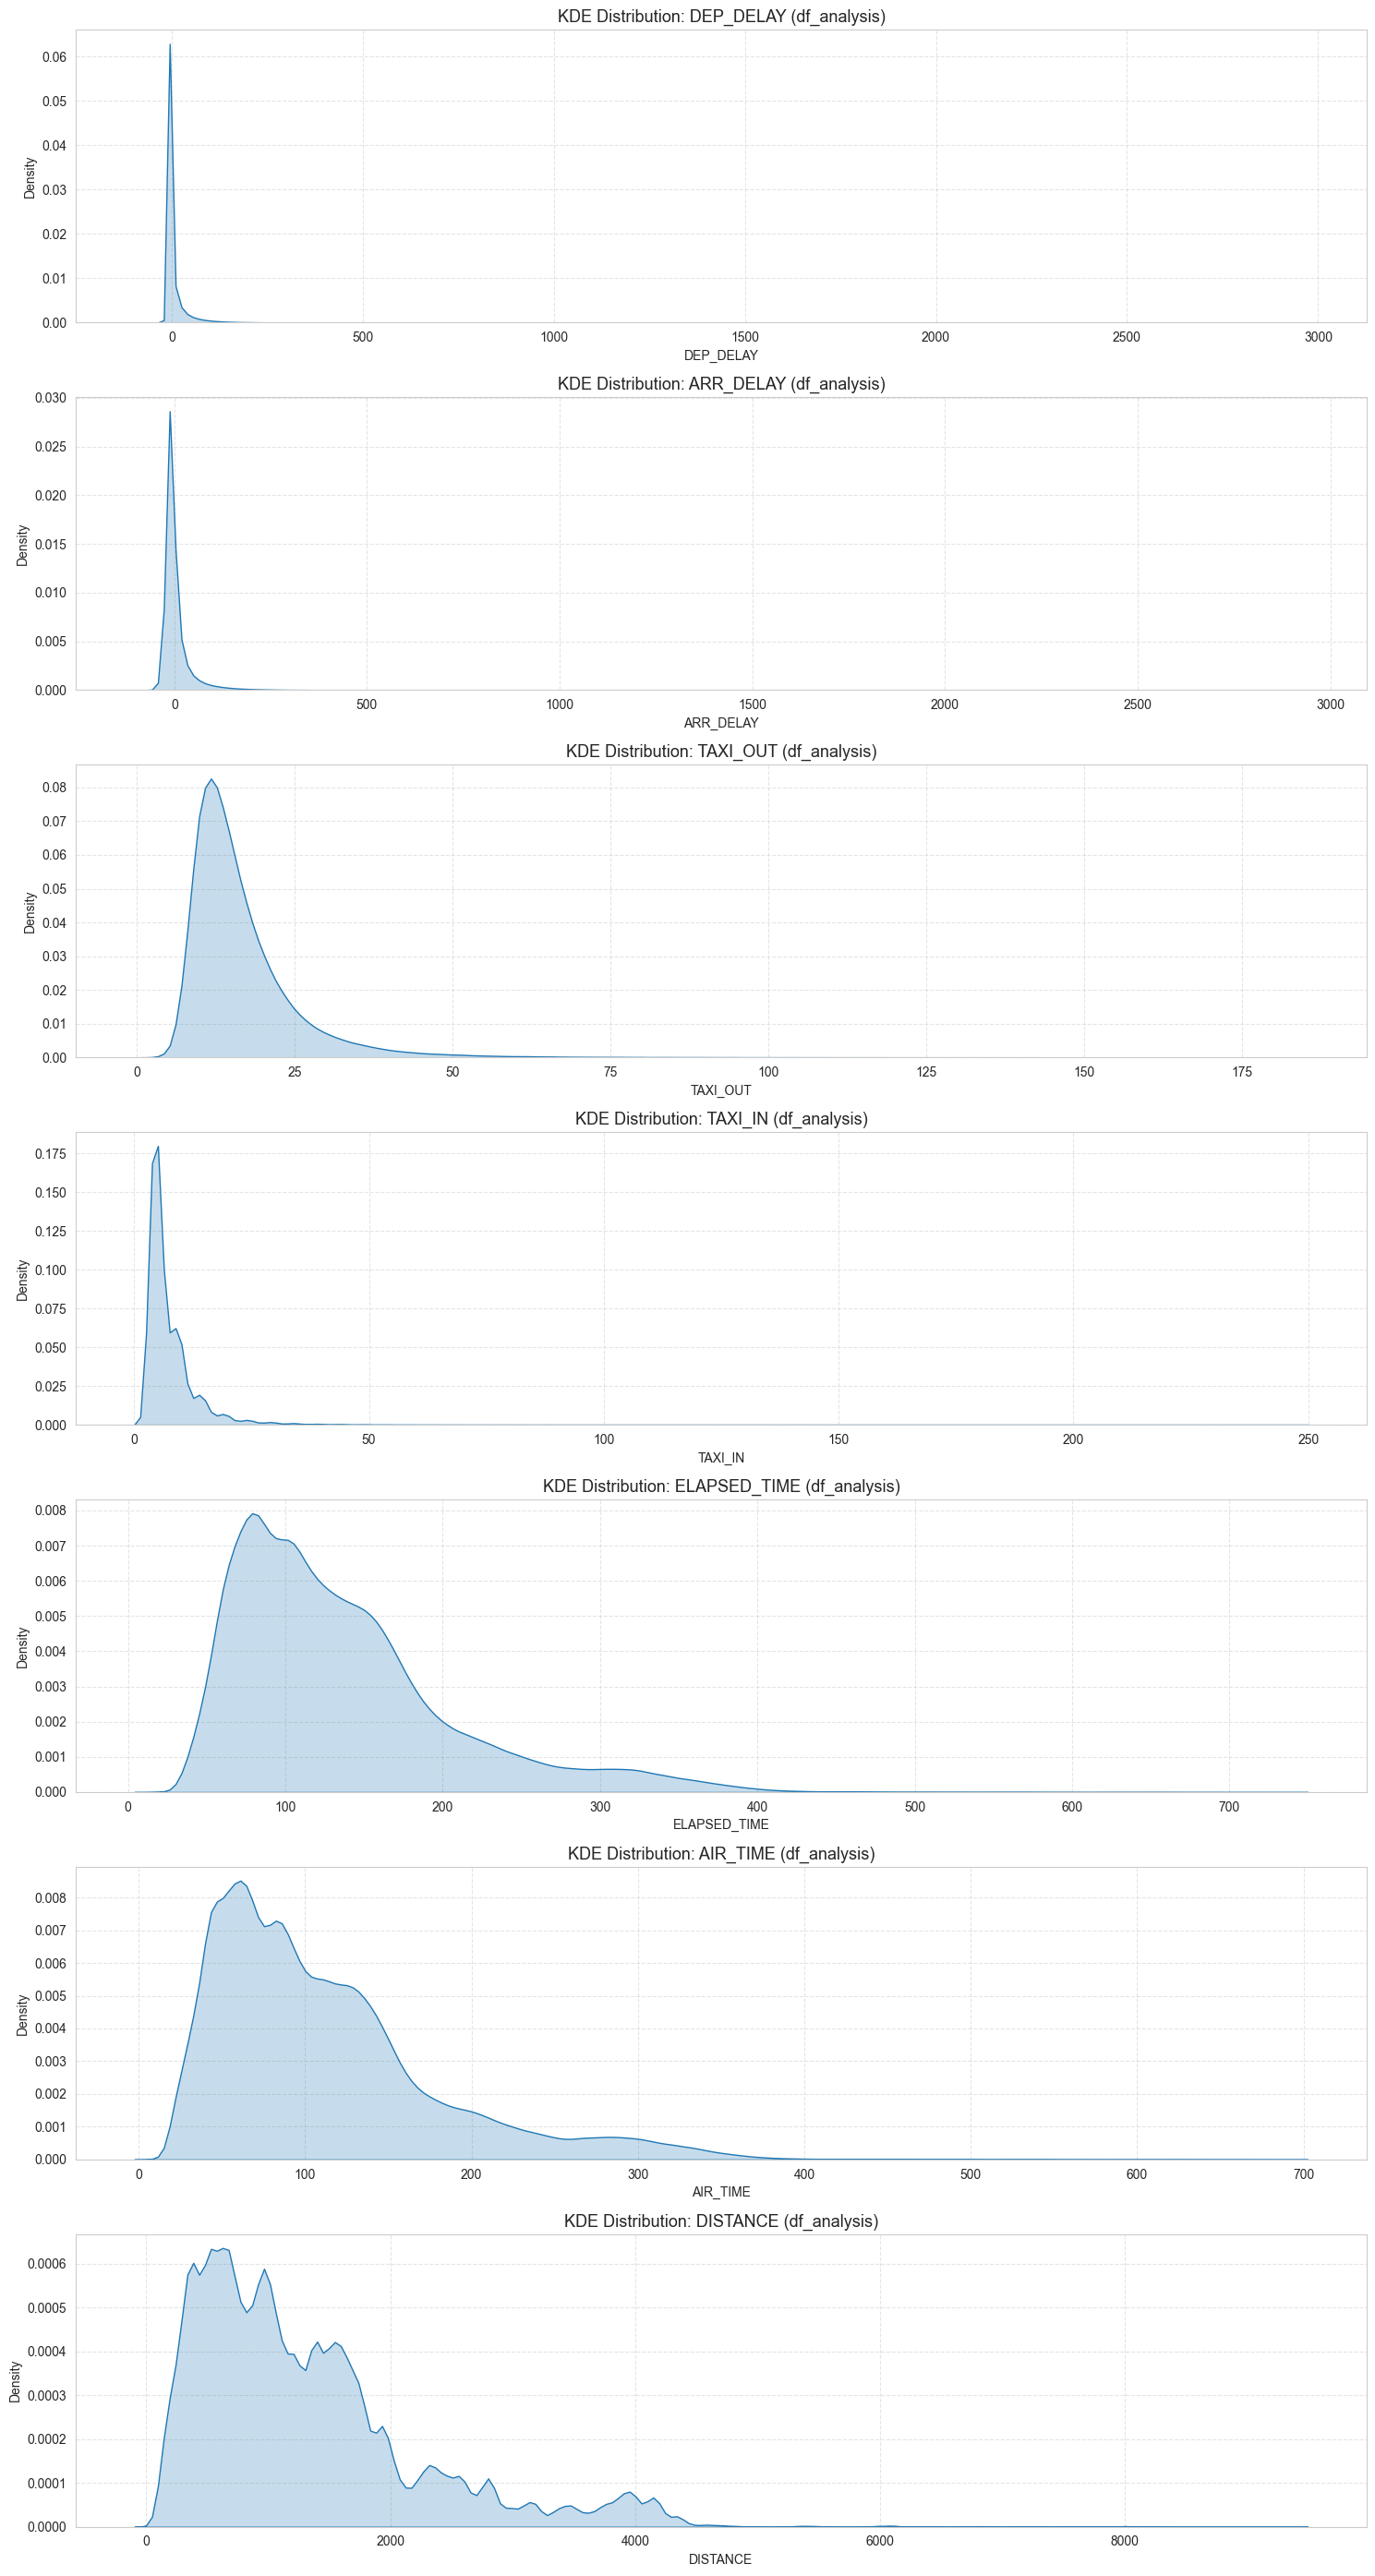

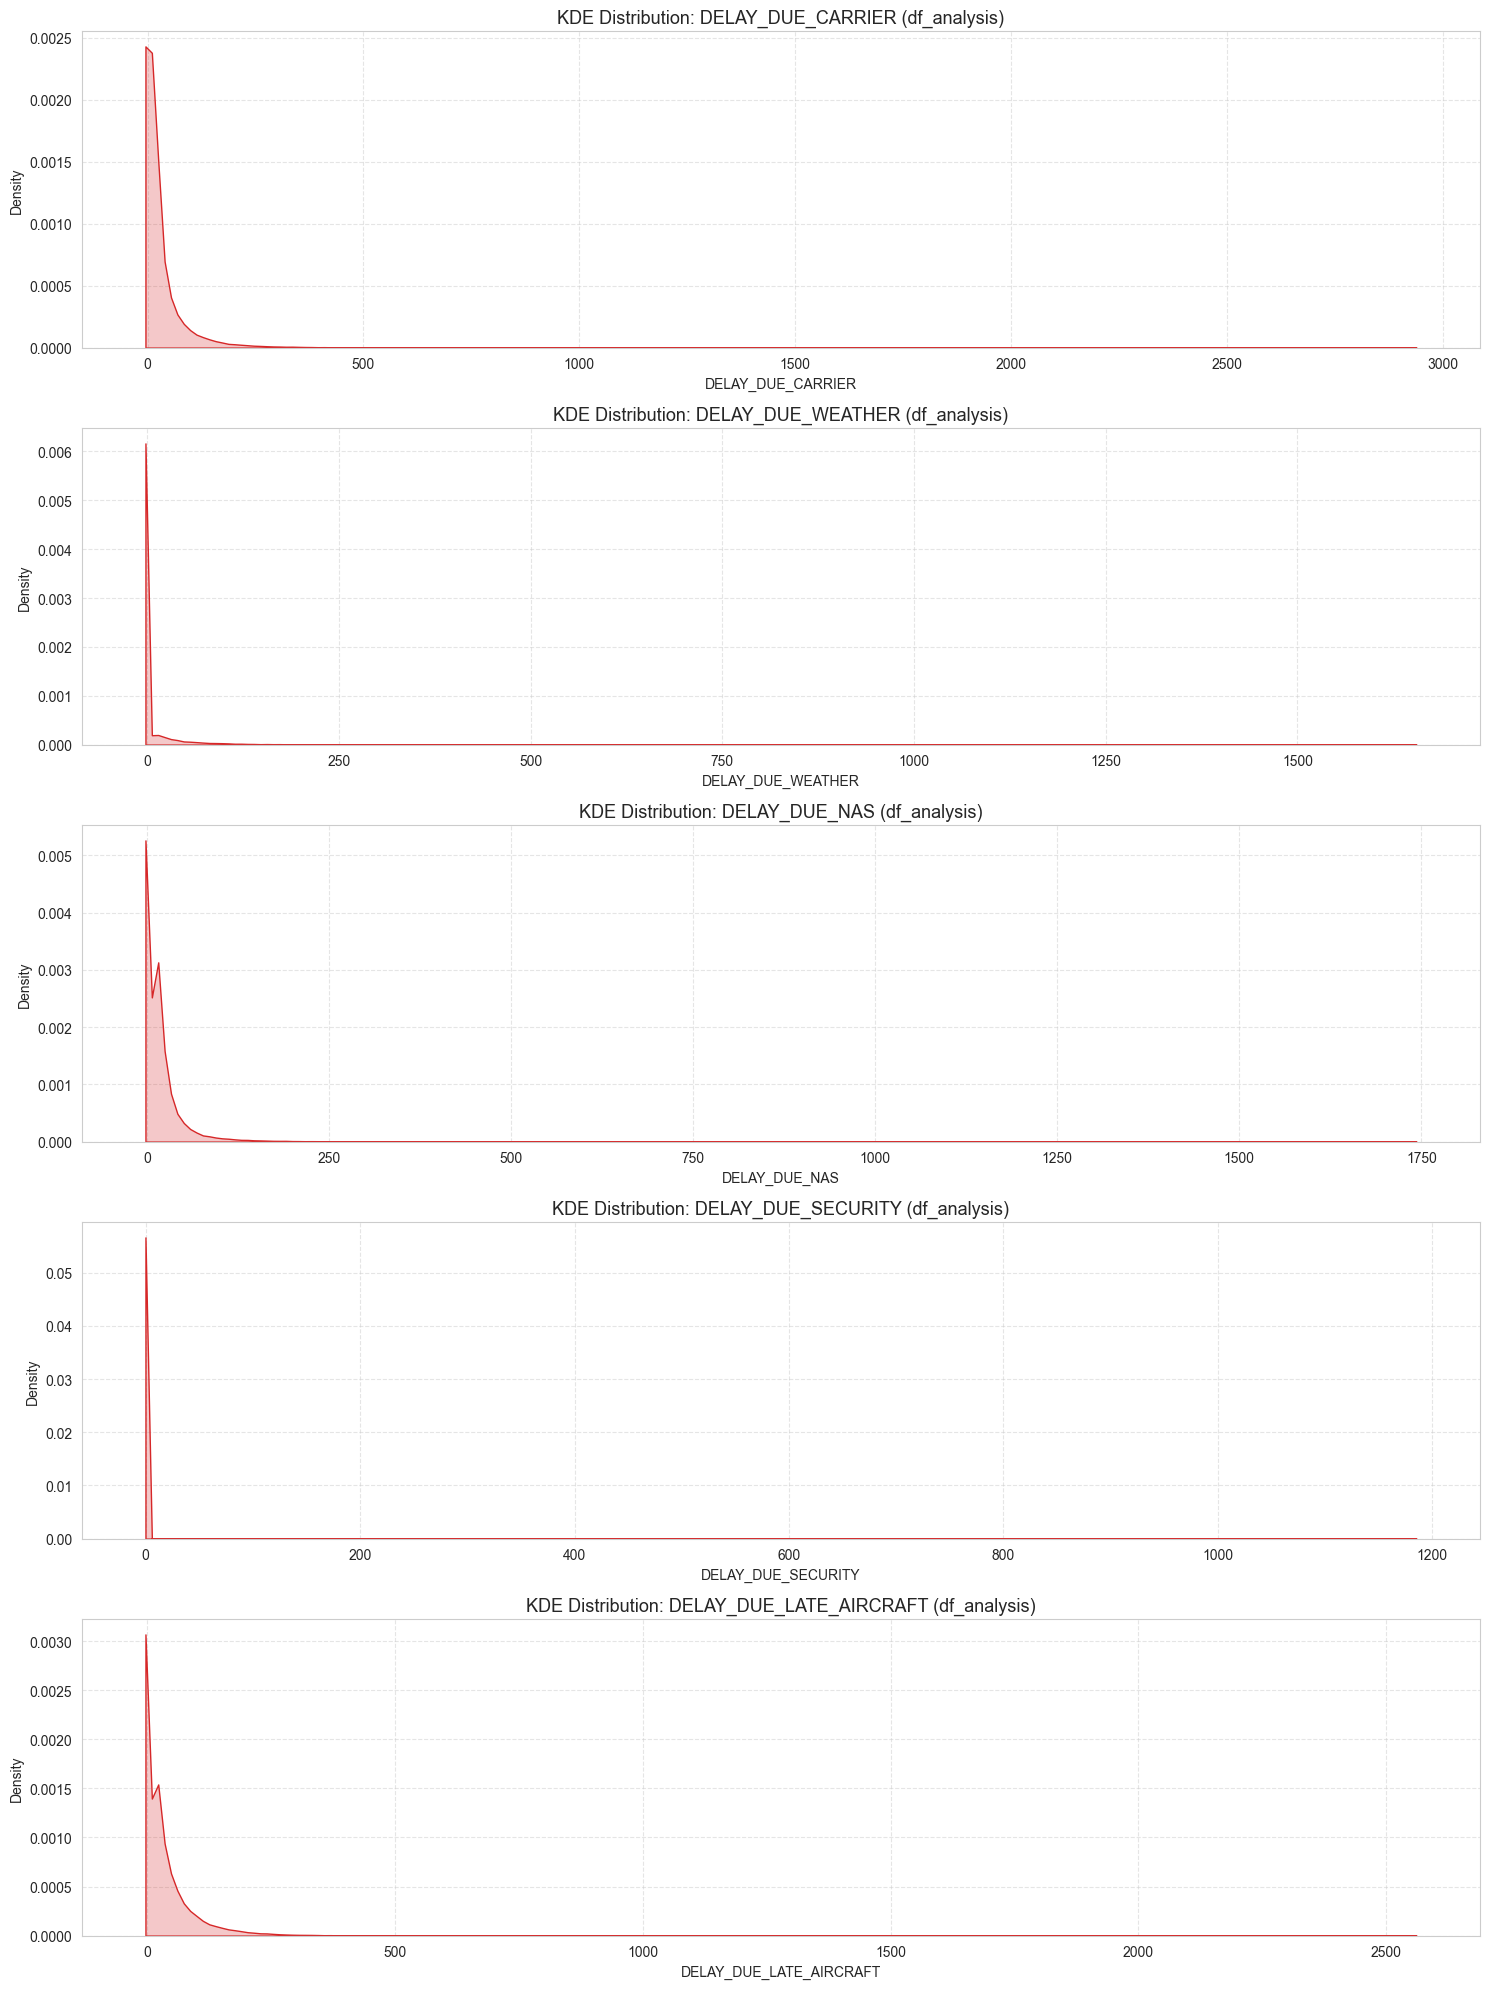

In [33]:
#### **KDE (Kernel Density Estimation) - Phân phối dữ liệu thực tế**
# --- 1. KDE cho nhóm Time Cols (Sử dụng df_analysis) ---
# Kiểm tra xem có bao nhiêu cột hợp lệ để tạo khung hình
valid_time_cols = [col for col in time_cols if col in df_analysis.columns]

if valid_time_cols:
    plt.figure(figsize=(15, 4 * len(valid_time_cols)))  # Điều chỉnh chiều cao ảnh tự động

    for i, col in enumerate(valid_time_cols, 1):
        plt.subplot(len(valid_time_cols), 1, i)

        # Vẽ biểu đồ mật độ
        sns.kdeplot(df_analysis[col].dropna(), fill=True, color='tab:blue')

        plt.title(f'KDE Distribution: {col} (df_analysis)', fontsize=13)
        plt.xlabel(col)
        plt.grid(linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không tìm thấy cột thời gian nào trong df_analysis.")

# --- 2. KDE cho nhóm Reason Cols (Sử dụng df_analysis) ---
# Nhóm này rất quan trọng để thấy phân phối "đuôi dài" (Long-tail) của các nguyên nhân trễ
valid_reason_cols = [col for col in reason_cols if col in df_analysis.columns]

if valid_reason_cols:
    plt.figure(figsize=(15, 4 * len(valid_reason_cols)))

    for i, col in enumerate(valid_reason_cols, 1):
        plt.subplot(len(valid_reason_cols), 1, i)

        # Dùng màu khác (vd: cam/đỏ) để phân biệt đây là nguyên nhân trễ
        sns.kdeplot(df_analysis[col].dropna(), fill=True, color='tab:red')

        plt.title(f'KDE Distribution: {col} (df_analysis)', fontsize=13)
        plt.xlabel(col)
        plt.grid(linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không tìm thấy cột nguyên nhân trễ nào trong df_analysis.")

#### **BƯỚC 2.2.2 TÍNH ĐỘ SKEWNESS VÀ KURTOSIS CHO TỪNG BIẾN**.

In [34]:
#### **TÍNH ĐỘ SKEWNESS VÀ KURTOSIS (Trên df_analysis)**
# --- HÀM TÍNH SKEWNESS ---
def skewness(distribution):
    distribution = distribution.dropna()
    n = len(distribution)
    if n < 3: return 0  # Tránh lỗi chia cho 0 nếu dữ liệu quá ít

    mean = np.mean(distribution)
    std = np.std(distribution)

    # Công thức Fisher-Pearson coefficient of skewness
    first = n / ((n - 1) * (n - 2))
    second = np.sum(((distribution - mean) / std) ** 3)
    return float(first * second)


# --- HÀM TÍNH KURTOSIS (EXCESS) ---
def kurtosis(distribution):
    distribution = distribution.dropna()
    n = len(distribution)
    if n < 4: return 0  # Tránh lỗi chia cho 0

    mean = np.mean(distribution)
    std = np.std(distribution)

    # Công thức Excess Kurtosis (đã trừ 3 để chuẩn hóa về Normal Dist = 0)
    return float((1 / n) * np.sum(((distribution - mean) / std) ** 4) - 3)


# --- THỰC HIỆN TÍNH TOÁN ---
# Sử dụng numeric_columns đã định nghĩa ở bước trước (Gồm Time + Reason cols)
# Kiểm tra lại để chắc chắn các cột tồn tại trong df_analysis
target_cols = [col for col in numeric_columns if col in df_analysis.columns]

results = []

print(f"📊 Đang tính toán độ lệch và độ nhọn cho {len(target_cols)} biến trên tập df_analysis...")

for col in target_cols:
    dist = df_analysis[col]

    skew = skewness(dist)
    kurt = kurtosis(dist)

    # 1. PHÂN LOẠI SKEWNESS (Độ lệch)
    if -0.5 <= skew <= 0.5:
        skew_level = "Approximately symmetric (Đối xứng)"
    elif -1 <= skew < -0.5 or 0.5 < skew <= 1:
        skew_level = "Moderately skewed (Lệch vừa)"
    else:
        skew_level = "Highly skewed (Lệch nhiều)"

    # 2. PHÂN LOẠI KURTOSIS (Độ nhọn)
    # Excess Kurtosis: Normal Distribution = 0
    if -0.1 <= kurt <= 0.1:
        kurt_level = "Mesokurtic (Chuẩn)"
    elif kurt > 0.1:
        kurt_level = "Leptokurtic (Nhọn - Đuôi dày)"
    else:
        kurt_level = "Platykurtic (Bẹt - Đuôi mỏng)"

    results.append([col, skew, skew_level, kurt, kurt_level])

# ĐỔ RA BẢNG
result_df = pd.DataFrame(results, columns=[
    "Column", "Skewness", "Skewness Level", "Kurtosis", "Kurtosis Level"
])

# Hiển thị
pd.set_option('display.max_rows', None)  # Hiển thị hết các dòng
display(result_df)

📊 Đang tính toán độ lệch và độ nhọn cho 12 biến trên tập df_analysis...


,Column,Skewness,Skewness Level,Kurtosis,Kurtosis Level
0,DEP_DELAY,11.52,Highly skewed (Lệch nhiều),245.43,Leptokurtic (Nhọn - Đuôi dày)
1,ARR_DELAY,10.29,Highly skewed (Lệch nhiều),209.03,Leptokurtic (Nhọn - Đuôi dày)
2,TAXI_OUT,3.45,Highly skewed (Lệch nhiều),23.27,Leptokurtic (Nhọn - Đuôi dày)
3,TAXI_IN,5.06,Highly skewed (Lệch nhiều),59.55,Leptokurtic (Nhọn - Đuôi dày)
4,ELAPSED_TIME,1.41,Highly skewed (Lệch nhiều),2.50,Leptokurtic (Nhọn - Đuôi dày)
5,AIR_TIME,1.44,Highly skewed (Lệch nhiều),2.57,Leptokurtic (Nhọn - Đuôi dày)
6,DISTANCE,1.50,Highly skewed (Lệch nhiều),2.84,Leptokurtic (Nhọn - Đuôi dày)
7,DELAY_DUE_CARRIER,22.09,Highly skewed (Lệch nhiều),788.02,Leptokurtic (Nhọn - Đuôi dày)
8,DELAY_DUE_WEATHER,44.79,Highly skewed (Lệch nhiều),2804.59,Leptokurtic (Nhọn - Đuôi dày)
9,DELAY_DUE_NAS,24.53,Highly skewed (Lệch nhiều),1285.89,Leptokurtic (Nhọn - Đuôi dày)


Dựa trên giá trị Skewness, Kurtosis và các biểu đồ KDE, hầu hết các biến thời gian chuyến bay và nguyên nhân chậm trễ đều có phân bố lệch phải mạnh và đuôi dày. Tất cả các biến đều có Skewness > 1, nhiều biến đạt mức 10–40, cho thấy phần lớn giá trị nằm gần 0 nhưng tồn tại một số ít chuyến bay chậm trễ rất lớn, kéo đuôi phân bố sang phải.

Kurtosis của các biến cũng vượt xa 3, nhiều biến đạt mức hàng nghìn đến hàng trăm nghìn, phản ánh dữ liệu tập trung mạnh quanh giá trị thấp nhưng có các ngoại lệ cực lớn tạo nên đuôi nặng.

Nhóm biến thời gian cơ bản như ELAPSED_TIME, AIR_TIME, DISTANCE, TAXI_IN, TAXI_OUT có Skewness thấp hơn (1.4–5.0) và Kurtosis vừa phải (2.5–59), cho thấy tính ổn định và ít chịu ảnh hưởng bởi ngoại lệ.

Ngược lại, các biến chậm trễ tổng quát DEP_DELAY và ARR_DELAY có Skewness khoảng 10–11 và Kurtosis 200–245, thể hiện sự biến động mạnh hơn do chịu tác động của một số ít trường hợp chậm trễ nghiêm trọng.

#### **BƯỚC 2.3 Tiến hành xử lý ngoại lệ cho tập dữ liệu được dùng để train mode**.

##### **Chiến lược Xử lý Ngoại lệ và Chuẩn hóa Dữ liệu Đa chiều**

Qua quá trình Phân tích Dữ liệu Khám phá (EDA), chúng tôi nhận thấy các biến định lượng trong bộ dữ liệu có đặc điểm phân phối rất khác nhau. Do đó, việc áp dụng một phương pháp xử lý ngoại lệ duy nhất (như Capping toàn bộ) là không tối ưu.Chúng tôi đề xuất chiến lược xử lý phân tầng (Tiered Approach) chia thành 3 nhóm biến với 3 phương pháp xử lý riêng biệt như sau:

##### **Nhóm 1: Biến Thời gian Trễ (DEP_DELAY)Đặc điểm: Phân phối lệch phải nặng (High Right Skewness), đuôi dài (Heavy-tailed), chứa cả giá trị âm (chuyến bay đi sớm) và giá trị dương cực lớn (trễ nghiêm trọng)**.

Phương pháp: Yeo-Johnson Power Transformation.

Lý giải lựa chọn: Trong bài toán dự báo rủi ro, các giá trị trễ lớn (Outliers) là tín hiệu quan trọng nhất. Phương pháp Capping (Cắt ngọn) sẽ làm mất đi thông tin về mức độ nghiêm trọng của sự cố, dẫn đến mô hình dự báo kém chính xác với các chuyến bay trễ dài.Xử lý giá trị âm: DEP_DELAY chứa số âm (đi sớm). Các phương pháp như Logarit hay Box-Cox không thể áp dụng trực tiếp. Yeo-Johnson là giải pháp tối ưu nhất để chuẩn hóa phân phối về dạng Gauss mà không gặp lỗi toán học với số âm.

##### **Nhóm 2: Biến Vật lý Chuyến bay (DISTANCE, AIR_TIME, ELAPSED_TIME)**

Đặc điểm: Giá trị luôn dương ($x > 0$), có biên độ dao động rất lớn (Range rộng). Ví dụ: Khoảng cách bay có thể từ 100km đến 10.000km.Phương pháp: Log Transformation (np.log1p).

Lý giải lựa chọn:Bản chất vật lý: Khoảng cách và thời gian bay là các đặc tính vật lý cố định của đường bay. Một chuyến bay dài 10.000km là sự thật hiển nhiên, không phải là "nhiễu" hay "lỗi dữ liệu". Do đó, tuyệt đối không được dùng Capping để cắt ngắn khoảng cách này (ví dụ: gán 10.000km thành 5.000km là sai lệch thực tế).Nén thang đo (Scale Compression): Sự chênh lệch quá lớn giữa chuyến bay ngắn và dài khiến mô hình hồi quy bị chi phối bởi các giá trị lớn. Biến đổi Logarit giúp "nén" thang đo lại (thu hẹp khoảng cách giữa giá trị lớn nhất và nhỏ nhất) giúp mô hình học được mối quan hệ tuyến tính tốt hơn mà vẫn giữ nguyên thứ tự độ lớn.

##### **Nhóm 3: Biến Vận hành Sân bay (TAXI_IN, TAXI_OUT)**

Đặc điểm: Thời gian lăn bánh trên đường băng. Thường dao động trong khoảng ngắn (10-30 phút), nhưng thỉnh thoảng có giá trị đột biến cực cao (ví dụ: 180 phút do kẹt đường băng cục bộ).

Phương pháp: IQR Capping (Winsorization).

Lý giải lựa chọn:Tính chất Nhiễu (Noise): Khác với thời gian bay (phụ thuộc vào khoảng cách), thời gian Taxi quá dài thường do các sự cố vận hành bất thường hoặc lỗi ghi nhận dữ liệu. Những giá trị này mang tính ngẫu nhiên cao và ít có giá trị dự báo cho tương lai.Tăng tính ổn định (Robustness): Việc cắt bỏ phần đuôi cực đoan (Capping) giúp loại bỏ nhiễu, giúp mô hình tập trung học quy luật vận hành thông thường tại sân bay thay vì cố gắng học các sự cố hy hữu.

In [35]:
from sklearn.preprocessing import PowerTransformer
# 1. Hàm Capping IQR
def cap_outliers_IQR(dataframe, col):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return dataframe[col].clip(lower=low, upper=high)

# 2. Thực hiện xử lý trên df_model
print("⏳ Đang xử lý dữ liệu trên tập df_model...")

# --- NHÓM 1: CAPPING IQR (Nhiễu vận hành) ---
cols_to_cap = ['TAXI_OUT', 'TAXI_IN']
for col in cols_to_cap:
    if col in df_model.columns:
        df_model[col] = cap_outliers_IQR(df_model, col)
        print(f"   -> Đã Capped (IQR): {col}")

# --- NHÓM 2: LOG TRANSFORM (Số dương lệch phải) ---
cols_to_log = ['DISTANCE', 'AIR_TIME', 'ELAPSED_TIME']
for col in cols_to_log:
    if col in df_model.columns:
        if df_model[col].min() >= 0: # Chỉ log số không âm
            df_model[col] = np.log1p(df_model[col])
            print(f"   -> Đã Log Transformed: {col}")

# --- NHÓM 3: YEO-JOHNSON (Số âm + lệch phải) ---
# Dành riêng cho DEP_DELAY vì nó vừa lệch, vừa có số âm
if 'DEP_DELAY' in df_model.columns:
    pt = PowerTransformer(method='yeo-johnson')
    df_model['DEP_DELAY'] = pt.fit_transform(df_model[['DEP_DELAY']])
    print(f"   -> Đã Yeo-Johnson Transformed: DEP_DELAY")

print("✅ Hoàn tất tiền xử lý. (Lưu ý: ARR_DELAY được giữ nguyên để làm Target).")

⏳ Đang xử lý dữ liệu trên tập df_model...
   -> Đã Capped (IQR): TAXI_OUT
   -> Đã Capped (IQR): TAXI_IN
   -> Đã Log Transformed: DISTANCE
   -> Đã Log Transformed: AIR_TIME
   -> Đã Log Transformed: ELAPSED_TIME
   -> Đã Yeo-Johnson Transformed: DEP_DELAY
✅ Hoàn tất tiền xử lý. (Lưu ý: ARR_DELAY được giữ nguyên để làm Target).


#### **Tạo biến mục tiêu và Kiểm tra cuối cùng (Target Creation & Final Check)**

In [ ]:
# 1. Tạo biến phân loại IS_DELAYED (nếu cần cho Classification)
if 'ARR_DELAY' in df_model.columns:
    df_model['IS_DELAYED'] = (df_model['ARR_DELAY'] > 15).astype(int)
    print("✅ Đã tạo biến mục tiêu: IS_DELAYED (>15 phút = 1, <=15 phút = 0)")
    print(f"   - Tỷ lệ trễ: {df_model['IS_DELAYED'].mean()*100:.2f}%")

# 2. Kiểm tra phân phối sau xử lý
print("\n📊 Kiểm tra phân phối sau xử lý:")
for col in ['TAXI_OUT', 'TAXI_IN', 'DISTANCE', 'AIR_TIME', 'ELAPSED_TIME', 'DEP_DELAY']:
    if col in df_model.columns:
        print(f"   {col}: min={df_model[col].min():.2f}, max={df_model[col].max():.2f}, skew={df_model[col].skew():.2f}")

# 3. Lưu dữ liệu đã xử lý (tùy chọn)
# df_model.to_csv('data/flights_processed_model.csv', index=False)
# df_analysis.to_csv('data/flights_processed_analysis.csv', index=False)
# print("\n✅ Đã lưu dữ liệu đã xử lý vào thư mục data/")

#### **Tính toán các giá trị Skewness và Kurtosis sau khi xử lý các giá trị outlier**

In [36]:
# 1. Định nghĩa lại danh sách các cột đã xử lý để đánh giá
# Bao gồm: Capping (Taxi), Log (Distance/Time), Yeo-Johnson (Dep Delay)
processed_cols_check = ['TAXI_OUT', 'TAXI_IN', 'DISTANCE', 'AIR_TIME', 'ELAPSED_TIME', 'DEP_DELAY']
# Chỉ lấy những cột thực sự tồn tại trong df_model
valid_cols = [col for col in processed_cols_check if col in df_model.columns]

# --- HÀM TÍNH SKEWNESS & KURTOSIS ---
def skewness(distribution):
    distribution = distribution.dropna()
    n = len(distribution)
    if n < 3: return 0
    mean = np.mean(distribution)
    std = np.std(distribution)
    first = n / ((n-1)*(n-2))
    second = np.sum(((distribution - mean) / std)**3)
    return float(first * second)

def kurtosis(distribution):
    distribution = distribution.dropna()
    n = len(distribution)
    if n < 4: return 0
    mean = np.mean(distribution)
    std = np.std(distribution)
    return float((1/n) * np.sum(((distribution - mean)/std)**4) - 3)

# --- TÍNH TOÁN TRÊN df_model ---
results = []

for col in valid_cols:
    dist = df_model[col] # Dữ liệu ĐÃ XỬ LÝ

    skew = skewness(dist)
    kurt = kurtosis(dist)

    # Phân loại nhanh
    skew_lvl = "Symmetric (Tốt)" if -0.5 <= skew <= 0.5 else "Skewed (Lệch)"

    results.append([col, skew, skew_lvl, kurt])

# Hiển thị bảng kết quả
result_df = pd.DataFrame(results, columns=["Column", "New Skewness", "Level", "New Kurtosis"])
print("📊 Bảng thống kê độ lệch/độ nhọn SAU KHI XỬ LÝ (df_model):")
print("Mong đợi: Skewness tiến gần về 0, Kurtosis giảm thấp.")
display(result_df)

📊 Bảng thống kê độ lệch/độ nhọn SAU KHI XỬ LÝ (df_model):
Mong đợi: Skewness tiến gần về 0, Kurtosis giảm thấp.


,Column,New Skewness,Level,New Kurtosis
0,TAXI_OUT,0.91,Skewed (Lệch),0.06
1,TAXI_IN,1.04,Skewed (Lệch),0.23
2,DISTANCE,-0.30,Symmetric (Tốt),-0.22
3,AIR_TIME,-0.03,Symmetric (Tốt),-0.38
4,ELAPSED_TIME,0.14,Symmetric (Tốt),-0.35
5,DEP_DELAY,-0.55,Skewed (Lệch),10.86


#### **Sau khi xử lý outlier bằng phương pháp IQR capping và winsorization, phân phối của các biến được ước lượng lại bằng Kernel Density Estimation (KDE) để đánh giá sự thay đổi về hình dạng phân phối, mức độ lệch (skewness), và độ nhọn (kurtosis).**

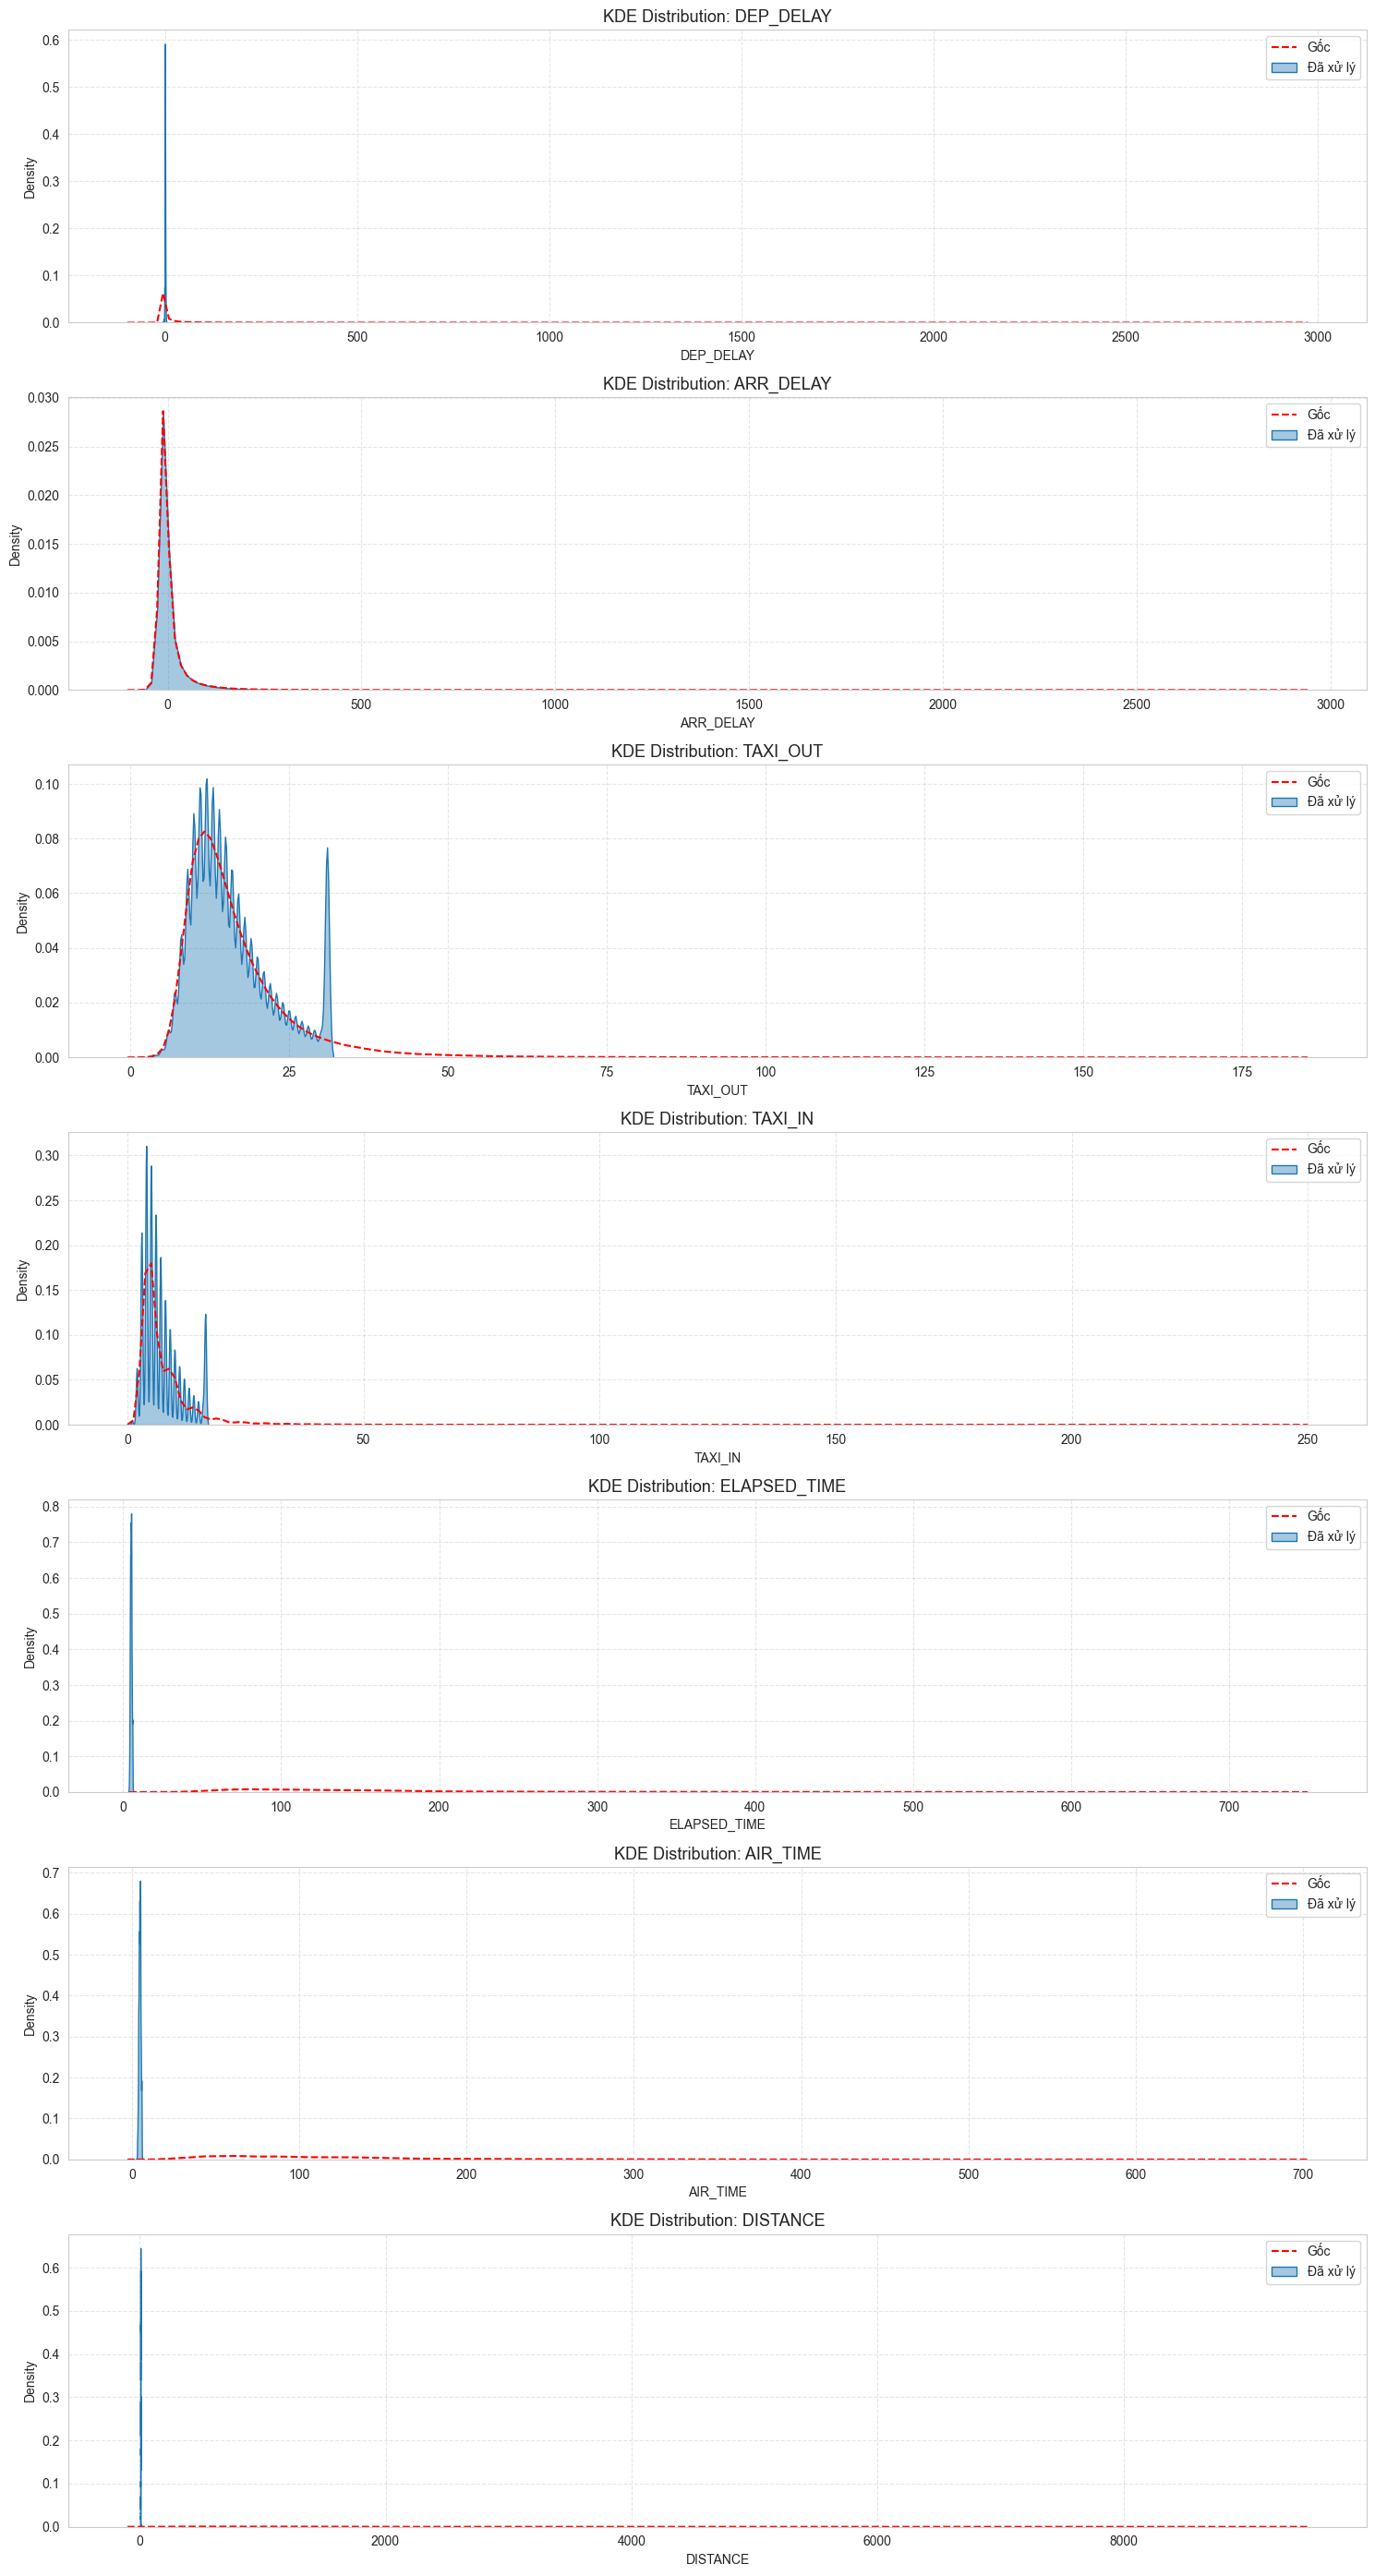

⚠️ Không tìm thấy cột nguyên nhân trễ nào.


In [39]:
# --- 1. KDE cho nhóm Time Cols (So sánh Gốc vs Đã xử lý) ---
valid_time_cols = [col for col in time_cols if col in df_analysis.columns and col in df_model.columns]

if valid_time_cols:
    plt.figure(figsize=(15, 4 * len(valid_time_cols)))

    for i, col in enumerate(valid_time_cols, 1):
        plt.subplot(len(valid_time_cols), 1, i)

        # Vẽ dữ liệu GỐC
        sns.kdeplot(df_analysis[col].dropna(), color='red', linestyle="--", label='Gốc')

        # Vẽ dữ liệu ĐÃ XỬ LÝ
        sns.kdeplot(df_model[col].dropna(), fill=True, color='tab:blue', alpha=0.4, label='Đã xử lý')

        plt.title(f'KDE Distribution: {col}', fontsize=13)
        plt.xlabel(col)
        plt.legend()
        plt.grid(linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không tìm thấy cột thời gian nào.")

# --- 2. KDE cho nhóm Reason Cols (So sánh Gốc vs Đã xử lý) ---
valid_reason_cols = [col for col in reason_cols if col in df_analysis.columns and col in df_model.columns]

if valid_reason_cols:
    plt.figure(figsize=(15, 4 * len(valid_reason_cols)))

    for i, col in enumerate(valid_reason_cols, 1):
        plt.subplot(len(valid_reason_cols), 1, i)

        # Vẽ dữ liệu GỐC
        sns.kdeplot(df_analysis[col].dropna(), color='red', linestyle="--", label='Gốc')

        # Vẽ dữ liệu ĐÃ XỬ LÝ
        sns.kdeplot(df_model[col].dropna(), fill=True, color='tab:orange', alpha=0.4, label='Đã xử lý')

        plt.title(f'KDE Distribution: {col}', fontsize=13)
        plt.xlabel(col)
        plt.legend()
        plt.grid(linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không tìm thấy cột nguyên nhân trễ nào.")
